# Saint Eynard - CampusIoT



In [76]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df

In [77]:
frames = pd.read_json('../logs/d1d1e80000000033_campusiot.ndjson.gz', lines=True)

In [78]:
frames

,deviceName,devEUI,rxInfo,txInfo,adr,fCnt,fPort,object,data,_redundancy,_timestamp,_date,_topic,margin,externalPowerSource,batteryLevel,batteryLevelUnavailable
0,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '17459c667f0f9d699c72661d970f46...,"{'frequency': 868500000, 'dr': 5}",1.0,1151.0,3.0,"{'data': {'battery': {'data': 3.497}, 'dlId': ...",502b0c04c49a0a000f0400fb3f040601ea0702a90d0302...,7.0,1687514517004,2023-06-23T10:01:57.004Z,application/rx,NaN,NaN,NaN,NaN
1,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 867100000, 'dr': 5}",1.0,1152.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",50240c041f9d0a000f0400033d0103029f0a0404dc5601...,8.0,1687515119135,2023-06-23T10:11:59.135Z,application/rx,NaN,NaN,NaN,NaN
2,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 868100000, 'dr': 5}",1.0,1153.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",50140f0400033d01f00c000000000000000000a40108,8.0,1687515723213,2023-06-23T10:22:03.213Z,application/rx,NaN,NaN,NaN,NaN
3,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 867900000, 'dr': 5}",1.0,1154.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",501e0f0400023d0103024a0a0404e1560100f00c000000...,8.0,1687516333229,2023-06-23T10:32:13.229Z,application/rx,NaN,NaN,NaN,NaN
4,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '17459c667f0f9d699c72661d970f46...,"{'frequency': 867300000, 'dr': 5}",1.0,1155.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",501e0f0400023e010302680a0404d8560100f00c000000...,8.0,1687516937040,2023-06-23T10:42:17.040Z,application/rx,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '02070479354051368acb9442acf01d...,"{'frequency': 867700000, 'dr': 5}",1.0,15000.0,3.0,"{'payloadVersion': 1, 'pressure': 874.38, 'tem...",501803028e0504048e550100f00c000000000000000000...,9.0,1695879611380,2023-09-28T05:40:11.380Z,application/rx,NaN,NaN,NaN,NaN
14200,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': 'b3032f394df189daa3290475aa68d4...,"{'frequency': 867900000, 'dr': 5}",1.0,15001.0,3.0,"{'payloadVersion': 1, 'pressure': 874.67, 'tem...",501e0f0400ff3d01030238060404ab550100f00c000000...,9.0,1695880215383,2023-09-28T05:50:15.383Z,application/rx,NaN,NaN,NaN,NaN
14201,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': 'f1238111093e12199cc5af415c84b8...,"{'frequency': 867300000, 'dr': 5}",1.0,15002.0,3.0,"{'payloadVersion': 1, 'pressure': 874.62, 'tem...",501e0f0400ff3d010302fa060404a6550100f00c000000...,10.0,1695880820390,2023-09-28T06:00:20.390Z,application/rx,NaN,NaN,NaN,NaN
14202,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 867500000, 'dr': 5}",1.0,15003.0,3.0,"{'payloadVersion': 1, 'pressure': 874.7, 'temp...",50180302eb060404ae550100f00c000000000000000000...,3.0,1695881424367,2023-09-28T06:10:24.367Z,application/rx,NaN,NaN,NaN,NaN


> NDJSON files contains 3 types of entries : join, rx, status
> They should be processed separally

## Status

> margin is the link margin

In [79]:
status = frames.loc[frames['_topic'] == 'application/status']
status = status[['deviceName', 'devEUI', '_timestamp', '_date', 'margin', 'externalPowerSource', 'batteryLevel', 'batteryLevelUnavailable']]
status

,deviceName,devEUI,_timestamp,_date,margin,externalPowerSource,batteryLevel,batteryLevelUnavailable
8,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1687519369164,2023-06-23T11:22:49.164Z,-6.0,0.0,0.0,1.0
33,WYRES_33_SAINTEYNARD,d1d1e80000000033,1687533907758,2023-06-23T15:25:07.758Z,16.0,0.0,0.0,1.0
58,WYRES_33_SAINTEYNARD,d1d1e80000000033,1687548403363,2023-06-23T19:26:43.363Z,5.0,0.0,0.0,1.0
131,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1687591889948,2023-06-24T07:31:29.948Z,-5.0,0.0,0.0,1.0
180,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1687620882147,2023-06-24T15:34:42.147Z,19.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
14073,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1695805919732,2023-09-27T09:11:59.732Z,24.0,0.0,0.0,1.0
14098,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1695820414701,2023-09-27T13:13:34.701Z,20.0,0.0,0.0,1.0
14122,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1695834912262,2023-09-27T17:15:12.262Z,12.0,0.0,0.0,1.0
14147,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1695849410059,2023-09-27T21:16:50.059Z,20.0,0.0,0.0,1.0


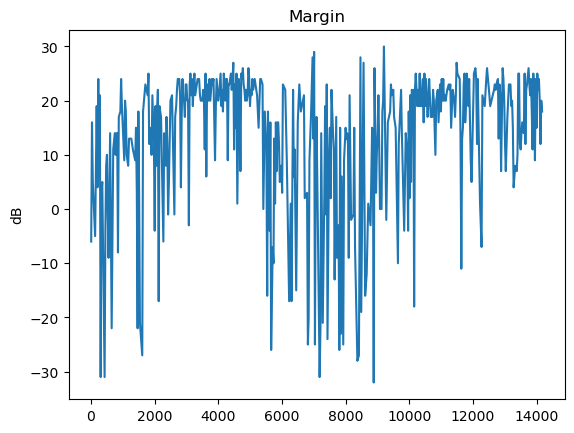

In [80]:
status['margin'].plot(title="Margin", ylabel="dB")
plt.show()

## Activation (OTAA)

In [81]:
join = frames.loc[frames['_topic'] == 'application/join']
join

,deviceName,devEUI,rxInfo,txInfo,adr,fCnt,fPort,object,data,_redundancy,_timestamp,_date,_topic,margin,externalPowerSource,batteryLevel,batteryLevelUnavailable


## RX

In [82]:
rx = frames.loc[frames['_topic'] == 'application/rx'].drop(\
            ['margin', 'externalPowerSource', 'batteryLevel', 'batteryLevelUnavailable'], axis=1)
rx

,deviceName,devEUI,rxInfo,txInfo,adr,fCnt,fPort,object,data,_redundancy,_timestamp,_date,_topic
0,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '17459c667f0f9d699c72661d970f46...,"{'frequency': 868500000, 'dr': 5}",1.0,1151.0,3.0,"{'data': {'battery': {'data': 3.497}, 'dlId': ...",502b0c04c49a0a000f0400fb3f040601ea0702a90d0302...,7.0,1687514517004,2023-06-23T10:01:57.004Z,application/rx
1,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 867100000, 'dr': 5}",1.0,1152.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",50240c041f9d0a000f0400033d0103029f0a0404dc5601...,8.0,1687515119135,2023-06-23T10:11:59.135Z,application/rx
2,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 868100000, 'dr': 5}",1.0,1153.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",50140f0400033d01f00c000000000000000000a40108,8.0,1687515723213,2023-06-23T10:22:03.213Z,application/rx
3,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 867900000, 'dr': 5}",1.0,1154.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",501e0f0400023d0103024a0a0404e1560100f00c000000...,8.0,1687516333229,2023-06-23T10:32:13.229Z,application/rx
4,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '17459c667f0f9d699c72661d970f46...,"{'frequency': 867300000, 'dr': 5}",1.0,1155.0,3.0,"{'data': {'dlId': {'data': 0}, 'payloadVersion...",501e0f0400023e010302680a0404d8560100f00c000000...,8.0,1687516937040,2023-06-23T10:42:17.040Z,application/rx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '02070479354051368acb9442acf01d...,"{'frequency': 867700000, 'dr': 5}",1.0,15000.0,3.0,"{'payloadVersion': 1, 'pressure': 874.38, 'tem...",501803028e0504048e550100f00c000000000000000000...,9.0,1695879611380,2023-09-28T05:40:11.380Z,application/rx
14200,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': 'b3032f394df189daa3290475aa68d4...,"{'frequency': 867900000, 'dr': 5}",1.0,15001.0,3.0,"{'payloadVersion': 1, 'pressure': 874.67, 'tem...",501e0f0400ff3d01030238060404ab550100f00c000000...,9.0,1695880215383,2023-09-28T05:50:15.383Z,application/rx
14201,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': 'f1238111093e12199cc5af415c84b8...,"{'frequency': 867300000, 'dr': 5}",1.0,15002.0,3.0,"{'payloadVersion': 1, 'pressure': 874.62, 'tem...",501e0f0400ff3d010302fa060404a6550100f00c000000...,10.0,1695880820390,2023-09-28T06:00:20.390Z,application/rx
14202,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,[{'gatewayID': '489ebde27fabee5863cb111ba9720c...,"{'frequency': 867500000, 'dr': 5}",1.0,15003.0,3.0,"{'payloadVersion': 1, 'pressure': 874.7, 'temp...",50180302eb060404ae550100f00c000000000000000000...,3.0,1695881424367,2023-09-28T06:10:24.367Z,application/rx


In [83]:
rx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13768 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deviceName   13768 non-null  object 
 1   devEUI       13768 non-null  object 
 2   rxInfo       13768 non-null  object 
 3   txInfo       13768 non-null  object 
 4   adr          13768 non-null  float64
 5   fCnt         13768 non-null  float64
 6   fPort        13768 non-null  float64
 7   object       13768 non-null  object 
 8   data         13768 non-null  object 
 9   _redundancy  13768 non-null  float64
 10  _timestamp   13768 non-null  int64  
 11  _date        13768 non-null  object 
 12  _topic       13768 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


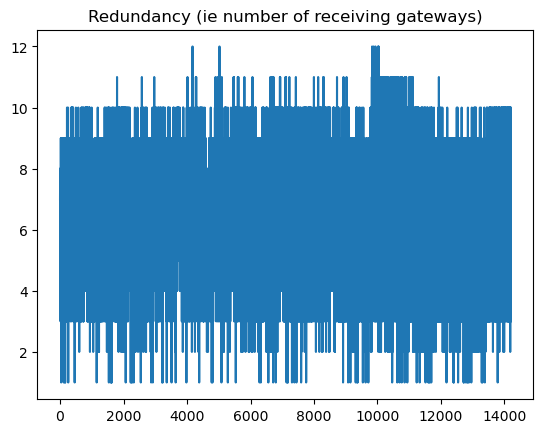

In [84]:
rx['_redundancy'].plot(title="Redundancy (ie number of receiving gateways)")
plt.show()

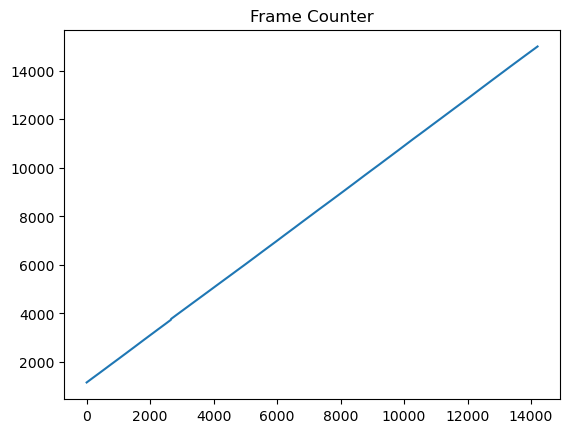

In [85]:
rx['fCnt'].plot(title="Frame Counter")
plt.show()

## TODO
* [ ] compute PER
* [ ] flatten rxInfo
* [ ] normalize txInfo
* [ ] plot distribution of frequencies
* [ ] plot distribution of dr (datarate)

In [86]:
### WIP
rxInfo = pd.json_normalize(rx['rxInfo'])

In [87]:
rxInfo

,0,1,2,3,4,5,6,7,8,9,10,11
0,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,None,None,None,None,None
1,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,None,None,None,None
2,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,None,None,None,None
3,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '100210b935d4ef152547bdb410de986...,None,None,None,None
4,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '100210b935d4ef152547bdb410de986...,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
13763,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': '141b05c2e419dca62356a998e450470...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,None,None,None
13764,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': '141b05c2e419dca62356a998e450470...,None,None,None
13765,{'gatewayID': 'f1238111093e12199cc5af415c84b81...,{'gatewayID': 'b3032f394df189daa3290475aa68d42...,{'gatewayID': '141b05c2e419dca62356a998e450470...,{'gatewayID': '100210b935d4ef152547bdb410de986...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,{'gatewayID': '93ddec05a2f5bcdc6b76b51f6b198cf...,{'gatewayID': 'd0fa38a195124ddd671ceb2ee2a7bac...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '02070479354051368acb9442acf01d3...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,None,None
13766,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '489ebde27fabee5863cb111ba9720cb...,{'gatewayID': '17459c667f0f9d699c72661d970f462...,None,None,None,None,None,None,None,None,None


#  Payload
> Since the payload decoder has changed during the experiment, some columns (pressure, temperature, light) should be merged (or removed)


In [88]:
payload = rx[['deviceName', 'devEUI', '_timestamp', '_date','object']]
obj = pd.json_normalize(payload['object'])
obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13768 entries, 0 to 13767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data.battery.data         5 non-null      float64
 1   data.dlId.data            30 non-null     float64
 2   data.light.data           5 non-null      float64
 3   data.payloadVersion.data  30 non-null     float64
 4   data.pressure.data        29 non-null     float64
 5   data.temperature.data     29 non-null     float64
 6   data.willListen.data      30 non-null     object 
 7   battery                   2293 non-null   float64
 8   light                     1694 non-null   float64
 9   payloadVersion            13738 non-null  float64
 10  pressure                  13056 non-null  float64
 11  temperature               13056 non-null  float64
 12  willListen                13738 non-null  object 
dtypes: float64(11), object(2)
memory usage: 1.4+ MB


In [89]:
payload = payload.join(obj).drop(columns='object')
payload = payload[['deviceName', 'devEUI', '_timestamp', '_date',\
                  'battery','light','pressure','temperature'  ]]
payload

,deviceName,devEUI,_timestamp,_date,battery,light,pressure,temperature
0,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1687514517004,2023-06-23T10:01:57.004Z,NaN,NaN,NaN,NaN
1,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1687515119135,2023-06-23T10:11:59.135Z,NaN,NaN,NaN,NaN
2,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1687515723213,2023-06-23T10:22:03.213Z,NaN,NaN,NaN,NaN
3,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1687516333229,2023-06-23T10:32:13.229Z,NaN,NaN,NaN,NaN
4,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1687516937040,2023-06-23T10:42:17.040Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14199,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1695879611380,2023-09-28T05:40:11.380Z,NaN,NaN,NaN,NaN
14200,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1695880215383,2023-09-28T05:50:15.383Z,NaN,NaN,NaN,NaN
14201,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1695880820390,2023-09-28T06:00:20.390Z,NaN,NaN,NaN,NaN
14202,WYRES_33_SAINTEYNARD_STATION,d1d1e80000000033,1695881424367,2023-09-28T06:10:24.367Z,NaN,NaN,NaN,NaN


In [90]:
payload.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13768 entries, 0 to 14203
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deviceName   13768 non-null  object 
 1   devEUI       13768 non-null  object 
 2   _timestamp   13768 non-null  int64  
 3   _date        13768 non-null  object 
 4   battery      2219 non-null   float64
 5   light        1638 non-null   float64
 6   pressure     12654 non-null  float64
 7   temperature  12654 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


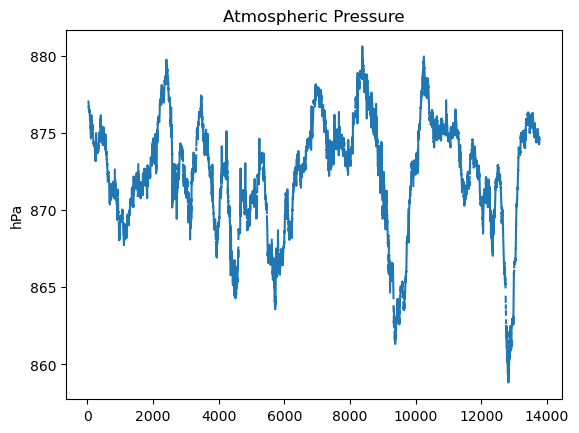

In [91]:
payload['pressure'].plot(title="Atmospheric Pressure", ylabel="hPa")
plt.show()

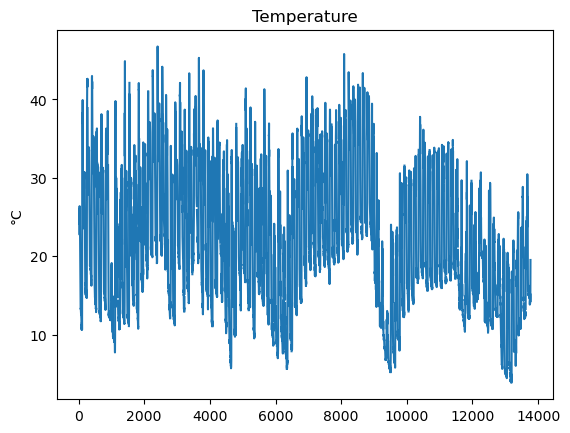

In [92]:
payload['temperature'].plot(title="Temperature", ylabel="°C")
plt.show()

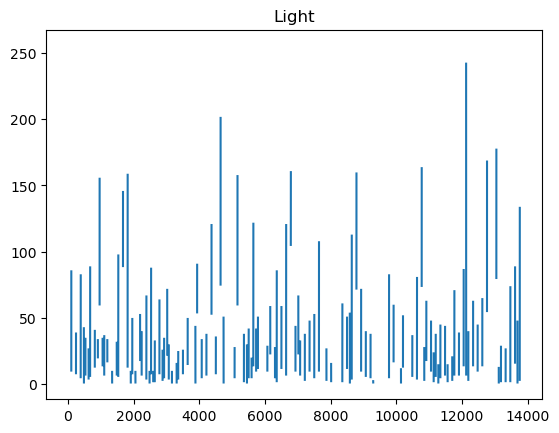

In [93]:
payload['light'].plot(title="Light")
plt.show()